In [42]:
import os
from os import listdir
import cv2
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
files_train = "./Dataset/MNIST _JPG _training"

data_train = []
data_train_label = []


l = -1

for filename in tqdm(listdir(files_train)):
    l = l+1
    for file in listdir(files_train +"/"+ filename):
        image = cv2.imread(files_train +"/"+ filename +'/'+ file)
        data_train_label.append(l)
        data_train.append(image)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.32s/it]


In [3]:
files_test = "./Dataset/MNIST_JPG_testing"

data_test = []
data_test_label = []


l = -1

for filename in tqdm(listdir(files_test)):
    l = l+1
    for file in listdir(files_test +"/"+ filename):
        image = cv2.imread(files_test +"/"+ filename +'/'+ file)
        data_test_label.append(l)
        data_test.append(image)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.37it/s]


In [4]:
data_train_label[0]

0

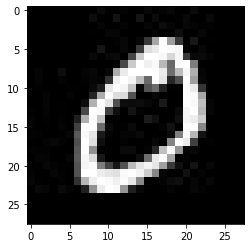

In [5]:
plt.imshow(data_train[0])
plt.show()

In [6]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [7]:
#Création des données de test 
X_train = np.array(data_train)
y_train = np.array(data_train_label)
X_test = np.array(data_test)
y_test = np.array(data_test_label)

In [8]:
X_test.shape

(10000, 28, 28, 3)

In [9]:
X_train.shape

(60000, 28, 28, 3)

In [10]:
X_train, X_test = X_train / 255.0, X_test / 255.0

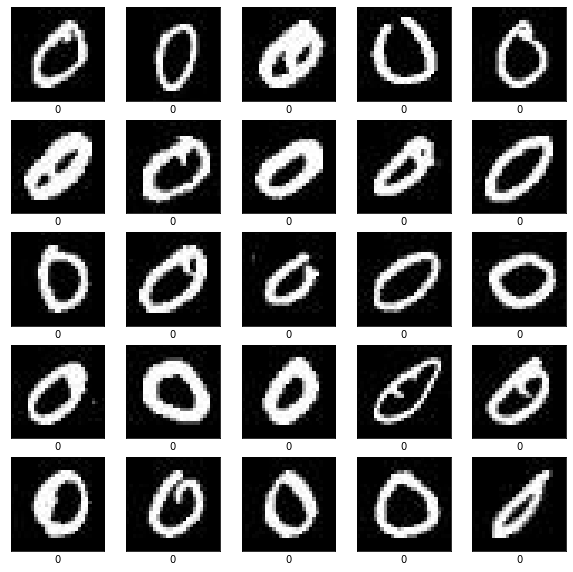

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(y_train[i])
plt.show()

In [22]:
X_train[0].shape

(28, 28, 3)

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [25]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [26]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [27]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 110s 58ms/step - loss: 0.1333 - accuracy: 0.9586 - val_loss: 0.0374 - val_accuracy: 0.9882
Epoch 2/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0435 - accuracy: 0.9860 - val_loss: 0.0400 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0318 - val_accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.0311 - val_accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0444 - val_accuracy: 0.9872
Epoch 6/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0328 - val_accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0

313/313 - 5s - loss: 0.0408 - accuracy: 0.9910 - 5s/epoch - 15ms/step


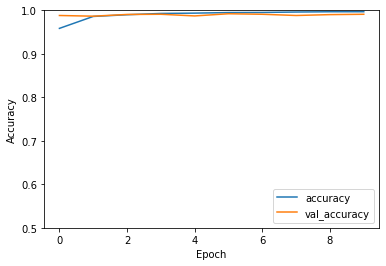

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


In [36]:
print(test_acc)

0.9909999966621399


313/313 - 5s - loss: 0.0408 - accuracy: 0.9910 - 5s/epoch - 15ms/step


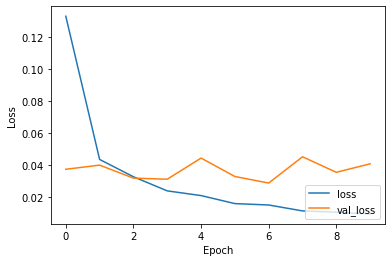

In [40]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

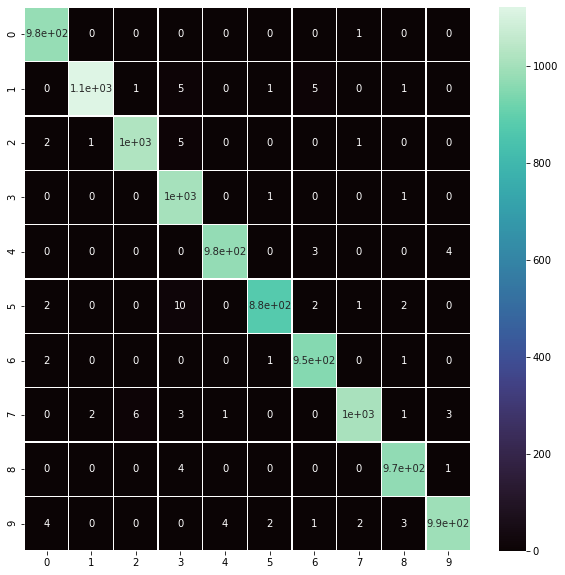

In [43]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis = -1)
confusion_matrice = tf.math.confusion_matrix(
    y_test,
    y_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)
plt.figure(figsize=(10,10))

sns.heatmap(confusion_matrice, annot=True,cmap='mako', linecolor='white', linewidths=.3)